# Simple Linear Regression Model in PyTorch and Tensorflow

In [1]:
from numpy.random import uniform, normal
import numpy as np
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

np.random.seed(0)  # Set seed for reproducibility

%precision %.4f

'%.4f'

In [2]:
# generate simulation data
n_sample = 100
a = 0.5
b = 10
sd = 10

X = uniform(0, 100, size=n_sample).astype(np.float32)
mu = a * X + b # linear predictor is a * x + b, link function is y=x
Y = normal(mu, sd) # Probability distribution is normal distribution

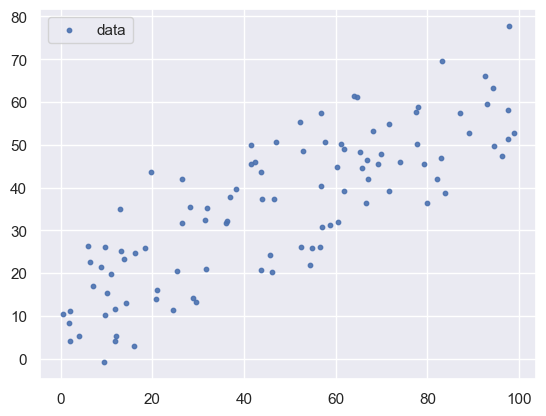

In [3]:
plt.scatter(X, Y, s=10, alpha=0.9, label='data')
#plt.ylim(0,80)
plt.legend()

# 1. Linear Regression Model in Tensorflow

In [4]:
import tensorflow as tf

2024-06-12 20:59:50.056496: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, 
                          input_shape=(1,), 
                          #kernel_initializer='zeros', 
                          bias_initializer='zeros'
                         )
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), 
              loss='mean_squared_error')

# Train the model
history = model.fit(X, Y, epochs=10, shuffle=False, verbose=1)

Epoch 1/10


/Users/steve.han/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1161.4839  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165.0661 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160.1171 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160.0082 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.9909 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.9754 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.9600 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.9446 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.9291 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.9137 


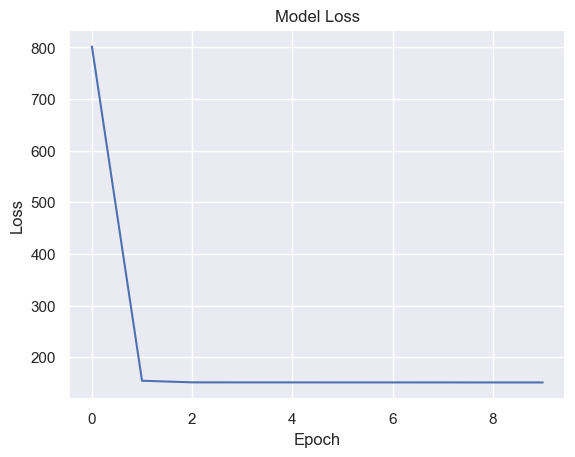

In [6]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


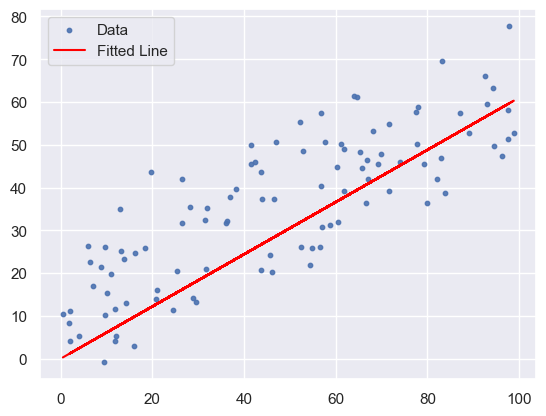

In [7]:
# Visualize the predictions
plt.scatter(X, Y, s=10, alpha=0.9, label='Data')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.legend()
plt.show()

In [8]:
# Print the weights of the model
weights, biases = model.layers[0].get_weights()
print(f"Weights: {weights}, Biases: {biases}")

Weights: [[0.6098]], Biases: [0.0348]


# 2. Linear Regression Model in PyTorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(0)

In [10]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

In [11]:
# Define the model
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        #nn.init.zeros_(self.linear.weight)
        nn.init.zeros_(self.linear.bias)
        
    def forward(self, x):
        return self.linear(x)

In [12]:
model = LinearRegressionModel()

In [13]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [14]:
# Train the model
num_epochs = 20
losses = []

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   
    losses.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 1598.0520
Epoch [2/20], Loss: 357.5695
Epoch [3/20], Loss: 172.2113
Epoch [4/20], Loss: 144.5110
Epoch [5/20], Loss: 140.3683
Epoch [6/20], Loss: 139.7456
Epoch [7/20], Loss: 139.6488
Epoch [8/20], Loss: 139.6306
Epoch [9/20], Loss: 139.6242
Epoch [10/20], Loss: 139.6195
Epoch [11/20], Loss: 139.6151
Epoch [12/20], Loss: 139.6107
Epoch [13/20], Loss: 139.6063
Epoch [14/20], Loss: 139.6020
Epoch [15/20], Loss: 139.5976
Epoch [16/20], Loss: 139.5932
Epoch [17/20], Loss: 139.5888
Epoch [18/20], Loss: 139.5844
Epoch [19/20], Loss: 139.5801
Epoch [20/20], Loss: 139.5757


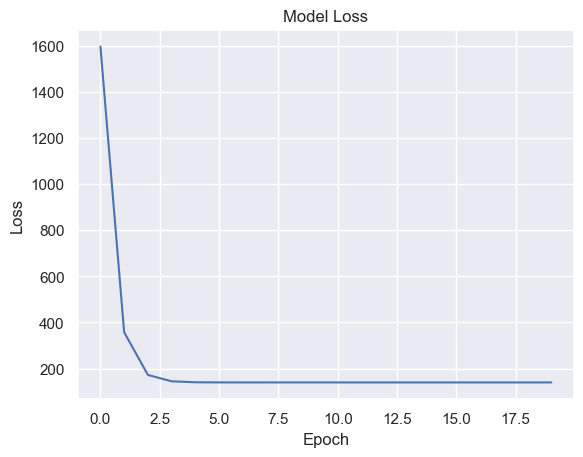

In [15]:
# Plot the loss over epochs
plt.plot(losses)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

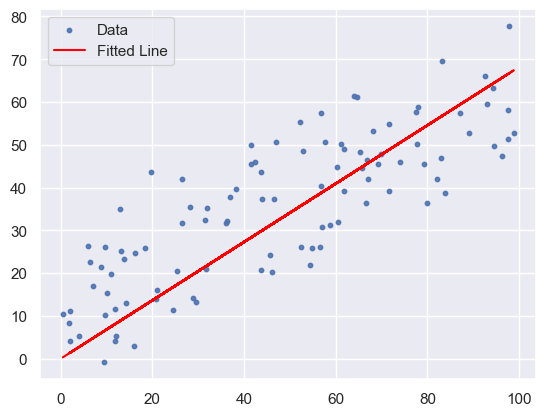

In [16]:
# Visualize the predictions
model.eval()
predicted = model(X_tensor).detach().numpy()

plt.scatter(X, Y, s=10, alpha=0.9, label='Data')
plt.plot(X, predicted, color='red', label='Fitted Line')
plt.legend()
plt.show()

In [17]:
# Print the weights of the model
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[0.6818]])
linear.bias tensor([0.0239])


### * To have similar weights and biases for both models, the following rules were applied:
##### a. Both models' weights and biases were initialized to zero.
##### b. Data shuffling was disabled (shuffle=False in TensorFlow).
##### c. The same random seed was used in both PyTorch and TensorFlow (torch.manual_seed(0) and np.random.seed(0)).